Tempo de rodagem do código:  0.06413531303405762





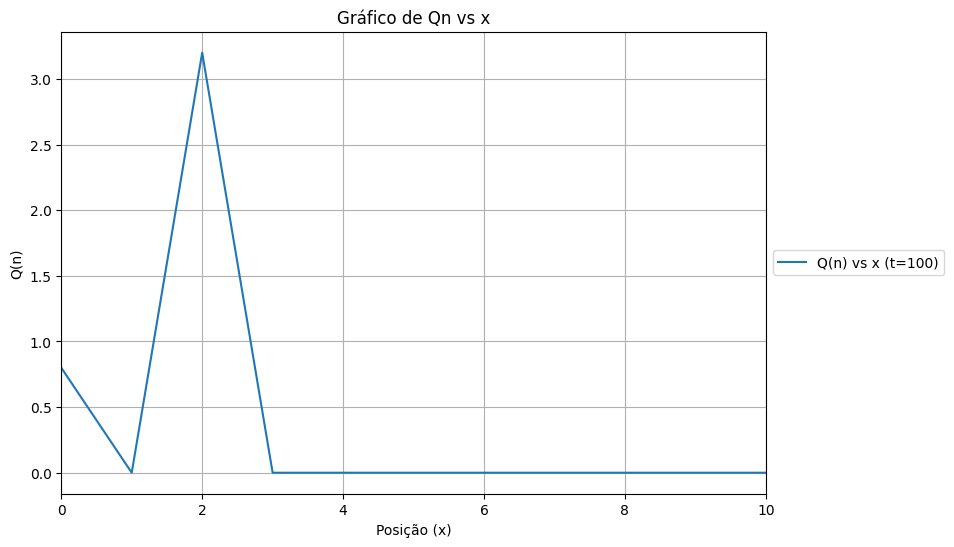

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import math

# Código do Trabalho 1

# Inicia a contagem de tempo
tic = time.time()

# Declaração das variáveis principais

# Valores iniciais físicos
#cIni = 0.8
#cInj = 0

t = 0
t_final = 20

Lx = 1
Lx_delta = 1
Lx_final = 10

Lxf = 4
tINT = 2

alpha = 1

uLinha = 0.1

cA = 0.8
cB = 0.5
cC = 0.4

Lx_Fronteira_Final = cC  # Verificar esse cálculo
Lx_Fronteira_Inicial = cC  # Verificar esse cálculo

t_delta = Lx_delta/uLinha



passos_t = int((t_final/ t_delta) + 1)
passos_L = int((Lx_final/ Lx_delta) + 1)

passos_tempo = np.arange(passos_t)
passos_Lx = np.arange(passos_L)
#valores_Lx = np.zeros(Lx_final+1)
#valores_t = np.zeros(t_final+1)

t_graph = 100
Lx_graph = 300

timerCode = 0

# n equivale ao tempo, e i ao espaço

#Qn = np.zeros((passos_t, passos_L))

Qn = np.zeros(Lx_final+1)
QnAnt = np.zeros(Lx_final+1)

c =  np.zeros((passos_L, passos_t))
n = 0
i = 0

"""
while i < passos_L:
  if (i <= Lxf):
    Qn[0][i] = cA
  else:
    Qn[0][i] = cB

  i = i+1
"""


i = 0
n = 0

"""
while i < passos_t:
  if (i <= tINT):
    Qn[i][0] = cA
  else:
    Qn[i][0] = cC

  i = i+1
"""


# Condições de contorno
while i < passos_t:
  if (i <= Lxf):
    QnAnt[i] = cA
  else:
    QnAnt[i] = cB

  i = i+1


Qn[0] = cA

i = 1
n = 0


# Parte do código que utilizava matrizes. Foi descontinuado devido a loops mais longos de verificação
"""
while n < (passos_t - 1):
  i = 1

  while i < (passos_L - 1):
    Qn[n+1][i]= Qn[n][i] - (t_delta/Lx_delta)*(uLinha*(Qn[n][i] - Qn[n][i-1]) - alpha*((Qn[n][i+1] - (2*Qn[n][i]) + Qn[n][i-1])/(Lx_delta)))
    i = i + Lx_delta

  n = n + t_delta
"""

#Nesse caso, o tempo anterior é QnAnt e o i representa o espaço
while n < (passos_t - 1):

  while i < (passos_L - 2):

    if (n <= tINT):
      Qn[0] = cA
    else:
      Qn[0] = cC

    if i == Lx_final:
      Qn[i]= QnAnt[i] - (t_delta/Lx_delta)*(2.0*uLinha*(QnAnt[i] - QnAnt[i-1])) - alpha*((Lx_Fronteira_Final - (2*QnAnt[i]) + QnAnt[i-1])/(Lx_delta))
    else:
      Qn[i]= QnAnt[i] - (t_delta/Lx_delta)*(uLinha*(QnAnt[i] - QnAnt[i-1])) - alpha*((QnAnt[i+1] - (2*QnAnt[i]) + QnAnt[i-1])/(Lx_delta))

    i = i + 1

  QnAnt = Qn
  n = n + 1
  i = 1


# Montagem dos gráficos
# Gráfico de posições de X para o mesmo tempo ------------------------------------------------------------------------------------------
"""
valores_x = Qn[t_graph,:]
valores_t = Qn[:,Lx_graph]
"""
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)

#plt.plot(passos_Lx, valores_x, label=f'Qn vs x (t={t_graph})')
plt.plot(passos_Lx, Qn, label=f'Q(n) vs x (t={t_graph})')

plt.xlabel('Posição (x)')
plt.ylabel('Q(n)')
plt.title('Gráfico de Qn vs x')
plt.xlim([0, Lx_final])
#plt.ylim([-1, 1])
plt.grid(True)
plt.legend()

# Move a legenda para fora do gráfico
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# Gráfico dos valores de um X fixo pelo tempo --------------------------------------------------------------------------------------------
# Essa parte do código foi descontinuada por enquanto
"""
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)

plt.plot(passos_tempo, valores_t, label=f'Qn vs t (x={Lx_graph})')

plt.xlabel('Tempo')
plt.ylabel('Qn')
plt.title('Gráfico de Qn vs t')
plt.xlim([0, t_final])
#plt.ylim([-1, 1])
plt.grid(True)
plt.legend()

# Move a legenda para fora do gráfico
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
"""

timerCode = time.time() - tic  # finaliza a contagem de tempo
"""
print(Qn, "\n\n")
print(Qn[t_graph,:], "\n\n")
print(Qn[:,Lx_graph], "\n\n")
"""
print("Tempo de rodagem do código: ", timerCode)
print("\n\n")


Tempo de rodagem do código:  0.052224159240722656





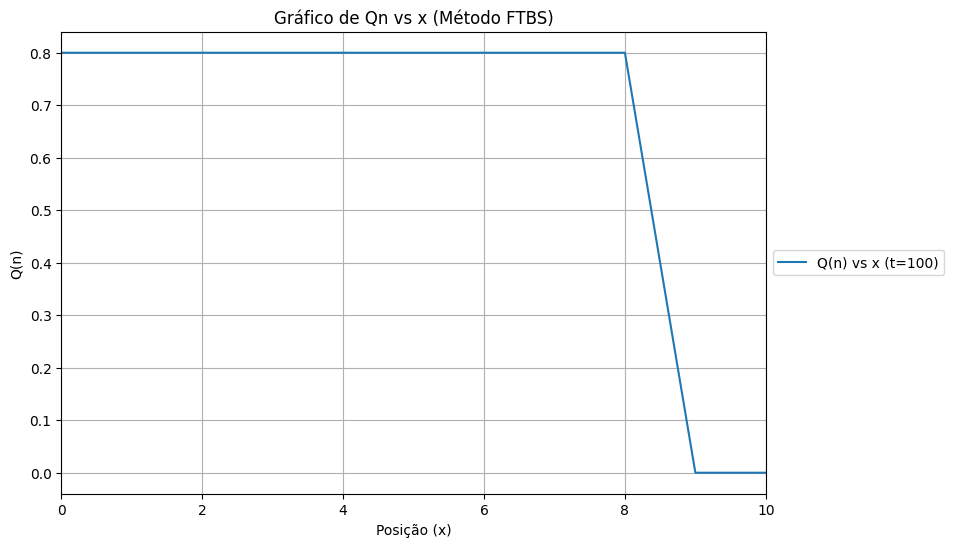

In [ ]:
# Código do Trabalho 2

# FTBS

i = 1
n = 0

"""
while n < (passos_t - 1):
  i = 1

  while i < (passos_t - 1):
    Qn[n+1][i]= Qn[n][i] - ((uLinha*t_delta)/Lx_delta)*(Qn[n][i] - Qn[n][i-1])
    i = i + Lx_delta

  n = n + t_delta
"""

while n < (passos_t - 1):

  while i < (passos_L - 2):

    if (n <= tINT):
      Qn[0] = cA
    else:
      Qn[0] = cC

    Qn[i]= QnAnt[i] - ((uLinha*t_delta)/Lx_delta)*(QnAnt[i] - QnAnt[i-1])

    i = i + 1

  QnAnt = Qn
  n = n + 1
  i = 1


# Montagem dos gráficos
# Gráfico de posições de X para o mesmo tempo ------------------------------------------------------------------------------------------
"""
valores_x = Qn[t_graph,:]
valores_t = Qn[:,Lx_graph]
"""
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)

#plt.plot(passos_Lx, valores_x, label=f'Qn vs x (t={t_graph})')
plt.plot(passos_Lx, Qn, label=f'Q(n) vs x (t={t_graph})')

plt.xlabel('Posição (x)')
plt.ylabel('Q(n)')
plt.title('Gráfico de Qn vs x (Método FTBS)')
plt.xlim([0, Lx_final])
#plt.ylim([-1, 1])
plt.grid(True)
plt.legend()

# Move a legenda para fora do gráfico
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

print("Tempo de rodagem do código: ", timerCode)
print("\n\n")

Tempo de rodagem do código:  0.052224159240722656





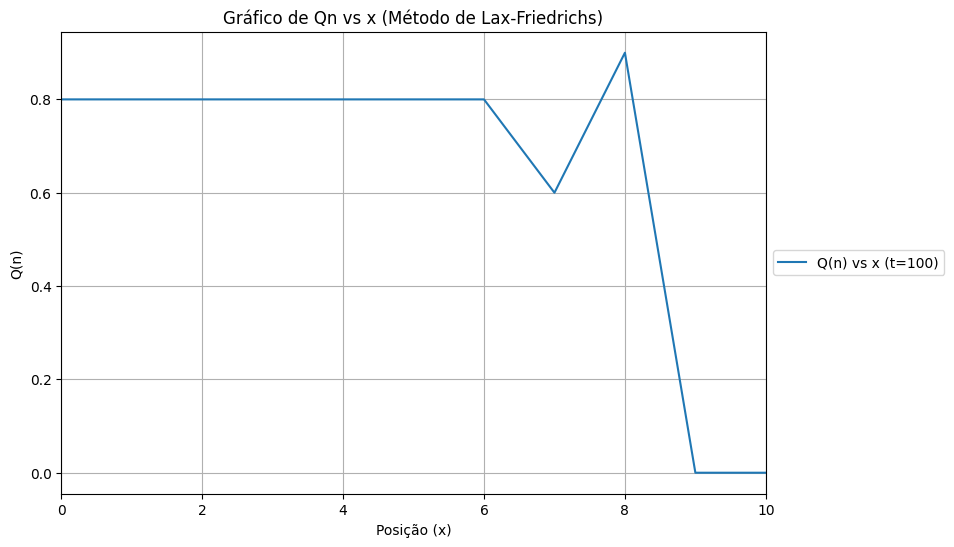

In [ ]:
# Código do Trabalho 2

# Lax-Friedrichs

i = 1
n = 0

while n < (passos_t - 1):

  while i < (passos_L - 2):

    if (n <= tINT):
      Qn[0] = cA
    else:
      Qn[0] = cC

    if i == Lx_final:
      Qn[i]= ((Lx_Fronteira_Final + QnAnt[i-1])/2) - ((uLinha*t_delta)/Lx_delta)*(Lx_Fronteira_Final - QnAnt[i-1])
    else:
      Qn[i]= ((QnAnt[i+1] + QnAnt[i-1])/2) - ((uLinha*t_delta)/Lx_delta)*(QnAnt[i+1] - QnAnt[i-1])

    i = i + 1

  QnAnt = Qn
  n = n + 1
  i = 1


# Montagem dos gráficos
# Gráfico de posições de X para o mesmo tempo ------------------------------------------------------------------------------------------
"""
valores_x = Qn[t_graph,:]
valores_t = Qn[:,Lx_graph]
"""
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)

#plt.plot(passos_Lx, valores_x, label=f'Qn vs x (t={t_graph})')
plt.plot(passos_Lx, Qn, label=f'Q(n) vs x (t={t_graph})')

plt.xlabel('Posição (x)')
plt.ylabel('Q(n)')
plt.title('Gráfico de Qn vs x (Método de Lax-Friedrichs)')
plt.xlim([0, Lx_final])
#plt.ylim([-1, 1])
plt.grid(True)
plt.legend()

# Move a legenda para fora do gráfico
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

print("Tempo de rodagem do código: ", timerCode)
print("\n\n")

Tempo de rodagem do código:  0.052224159240722656





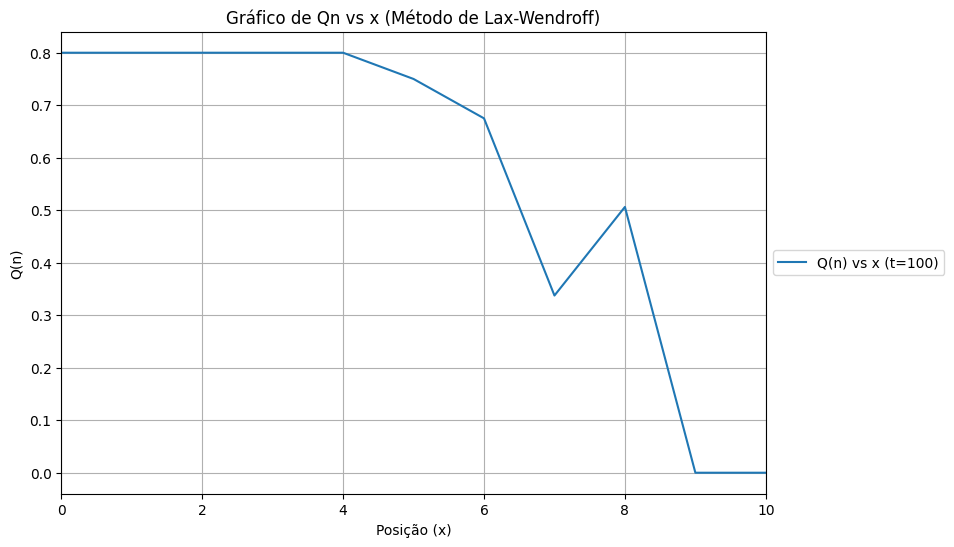

In [ ]:
# Código do Trabalho 2

# Lax-Wendroff

i = 1
n = 0

while n < (passos_t - 1):

  while i < (passos_L - 2):

    if (n <= tINT):
      Qn[0] = cA
    else:
      Qn[0] = cC

    if i == Lx_final:
      Qn[i]= QnAnt[i] - ((uLinha*t_delta)/Lx_delta)*(Lx_Fronteira_Final - QnAnt[i-1]) + ((uLinha*uLinha * t_delta*t_delta)/(2*Lx_delta*Lx_delta))*(Lx_Fronteira_Final - 2*QnAnt[i] + QnAnt[i-1])
    else:
      Qn[i]= QnAnt[i] - ((uLinha*t_delta)/Lx_delta)*(QnAnt[i+1] - QnAnt[i-1]) + ((uLinha*uLinha * t_delta*t_delta)/(2*Lx_delta*Lx_delta))*(QnAnt[i+1] - 2*QnAnt[i] + QnAnt[i-1])

    i = i + 1

  QnAnt = Qn
  n = n + 1
  i = 1


# Montagem dos gráficos
# Gráfico de posições de X para o mesmo tempo ------------------------------------------------------------------------------------------
"""
valores_x = Qn[t_graph,:]
valores_t = Qn[:,Lx_graph]
"""
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)

#plt.plot(passos_Lx, valores_x, label=f'Qn vs x (t={t_graph})')
plt.plot(passos_Lx, Qn, label=f'Q(n) vs x (t={t_graph})')

plt.xlabel('Posição (x)')
plt.ylabel('Q(n)')
plt.title('Gráfico de Qn vs x (Método de Lax-Wendroff)')
plt.xlim([0, Lx_final])
#plt.ylim([-1, 1])
plt.grid(True)
plt.legend()

# Move a legenda para fora do gráfico
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

print("Tempo de rodagem do código: ", timerCode)
print("\n\n")

Tempo de rodagem do código:  0.052224159240722656





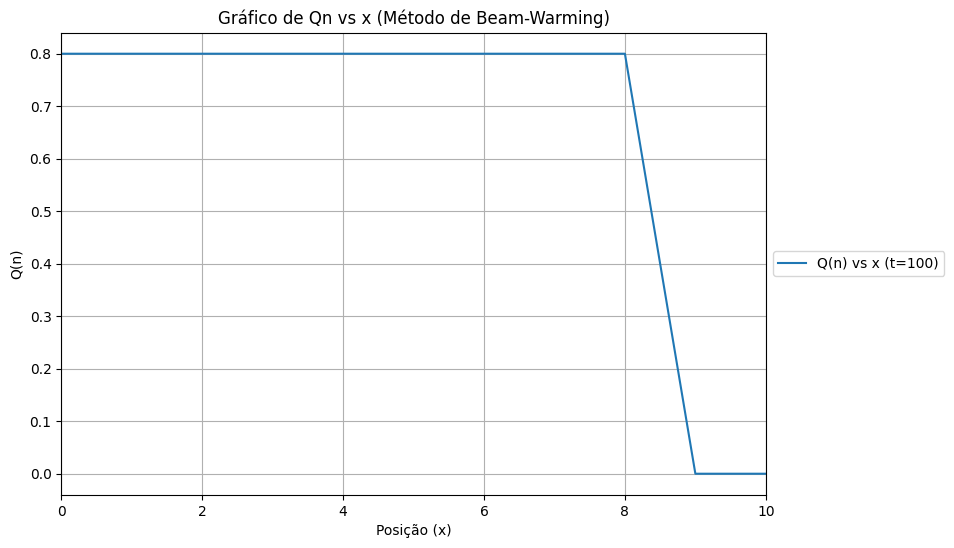

In [ ]:
# Código do Trabalho 2

# Beam-Warming

i = 1
n = 0

while n < (passos_t - 1):

  while i < (passos_L - 2):

    if (n <= tINT):
      Qn[0] = cA
    else:
      Qn[0] = cC
      Lx_Fronteira_Final

    if i == 1:
      Qn[i]= QnAnt[i] - ((uLinha*t_delta)/(2*Lx_delta))*((3*QnAnt[i]) - (4*QnAnt[i-1]) + Lx_Fronteira_Inicial) + ((uLinha*uLinha * t_delta*t_delta)/(2*Lx_delta*Lx_delta))*(QnAnt[i] - 2*QnAnt[i-1] + Lx_Fronteira_Inicial)
    else:
      Qn[i]= QnAnt[i] - ((uLinha*t_delta)/(2*Lx_delta))*((3*QnAnt[i]) - (4*QnAnt[i-1]) + QnAnt[i-2]) + ((uLinha*uLinha * t_delta*t_delta)/(2*Lx_delta*Lx_delta))*(QnAnt[i] - 2*QnAnt[i-1] + QnAnt[i-2])

    i = i + 1

  QnAnt = Qn
  n = n + 1
  i = 1


# Montagem dos gráficos
# Gráfico de posições de X para o mesmo tempo ------------------------------------------------------------------------------------------
"""
valores_x = Qn[t_graph,:]
valores_t = Qn[:,Lx_graph]
"""
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)

#plt.plot(passos_Lx, valores_x, label=f'Qn vs x (t={t_graph})')
plt.plot(passos_Lx, Qn, label=f'Q(n) vs x (t={t_graph})')

plt.xlabel('Posição (x)')
plt.ylabel('Q(n)')
plt.title('Gráfico de Qn vs x (Método de Beam-Warming)')
plt.xlim([0, Lx_final])
#plt.ylim([-1, 1])
plt.grid(True)
plt.legend()

# Move a legenda para fora do gráfico
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

print("Tempo de rodagem do código: ", timerCode)
print("\n\n")

t_Deta precisa ser menor ou igual a  10.0
t_delta escolhido foi:  0.5
Passos de tempo:  11
Tempo de rodagem do código:  0.030519485473632812





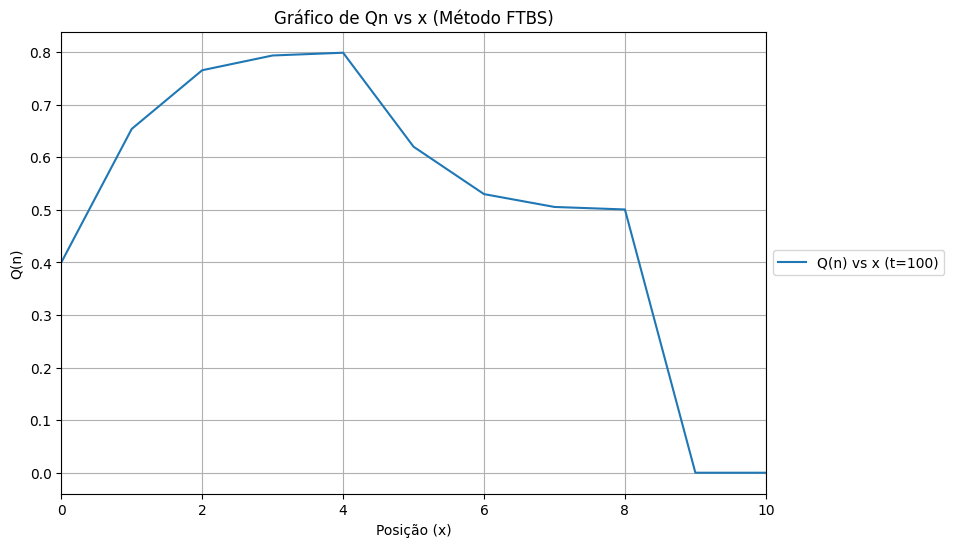

In [ ]:
# Código do Trabalho 3 **********************************************************************************************************************************

# FTBS

tic = time.time()

t = 0
tINT = 2
t_final = 5

Lx = 0
Lx_delta = 1
Lx_final = 10
Lxf = 4

alpha = 1

uLinha = 0.1

cA = 0.8
cB = 0.5
cC = 0.4

Lx_Fronteira_Final = cC  # Verificar esse cálculo
Lx_Fronteira_Inicial = cC  # Verificar esse cálculo

t_delta = Lx_delta/uLinha

print("t_Deta precisa ser menor ou igual a ", t_delta)

t_delta = 0.5

print("t_delta escolhido foi: ", t_delta)

bigC = ((uLinha*t_delta)/Lx_delta)

passos_t = int((t_final/ t_delta) + 1)
passos_L = int((Lx_final/ Lx_delta) + 1)

print("Passos de tempo: ", passos_t)

passos_tempo = np.arange(passos_t)
passos_Lx = np.arange(passos_L)

timerCode = 0

# n equivale ao tempo, e i ao espaço

Qn = np.zeros(Lx_final+1)
QnAnt = np.zeros(Lx_final+1)

i = 1
n = 0

while i < passos_t:
  if (i <= Lxf):
    QnAnt[i] = cA
  else:
    QnAnt[i] = cB

  i = i+1


i = 1
n = 0

while n < (passos_t - 1):

  if (n <= tINT):
    Qn[0] = cA
  else:
    Qn[0] = cC

  while i < (passos_L - 2):

    Qn[i]= QnAnt[i] - (bigC*(QnAnt[i] - QnAnt[i-1]))

    i = i + 1

  QnAnt = Qn
  n = n + 1
  i = 1


# Montagem dos gráficos
# Gráfico de posições de X para o mesmo tempo ------------------------------------------------------------------------------------------
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)

#plt.plot(passos_Lx, valores_x, label=f'Qn vs x (t={t_graph})')
plt.plot(passos_Lx, Qn, label=f'Q(n) vs x (t={t_graph})')

plt.xlabel('Posição (x)')
plt.ylabel('Q(n)')
plt.title('Gráfico de Qn vs x (Método FTBS)')
plt.xlim([0, Lx_final])
#plt.ylim([-1, 1])
plt.grid(True)
plt.legend()

# Move a legenda para fora do gráfico
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

timerCode = time.time() - tic  # finaliza a contagem de tempo

print("Tempo de rodagem do código: ", timerCode)
print("\n\n")

Tempo de rodagem do código:  0.030519485473632812





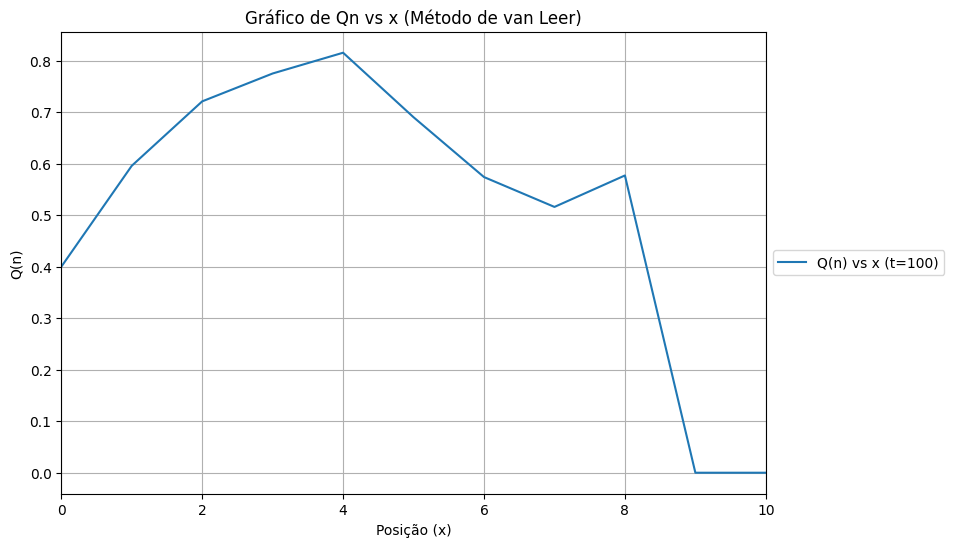

In [ ]:
# Código do Trabalho 3

# Van Leer

bigO1 = 0.5  # Fazer um vetor só deles
bigO2 = 0.5  # DeltaQ/DeltaQ

Vpos = 0     # Valor da fronteira avançada (i + 1/2)
Vneg = 0     # Valor da fronteira atrasada (i - 1/2)

#QnFrontPos = np.zeros(Lx_final+1)
#QnFrontNeg = np.zeros(Lx_final+1)
QnFrontPos = 0
QnFrontNeg = 0

if bigO1 >= 0:
  Vpos = (bigO1 + bigO1)/(1 + bigO1)
else:
  bigO1 = -bigO1
  Vpos = (bigO1 + bigO1)/(1 + bigO1)
  bigO1 = -bigO1



if bigO2 >= 0:
  Vneg = (bigO2 + bigO2)/(1 + bigO2)
else:
  bigO2 = -bigO2
  Vneg = (bigO2 + bigO2)/(1 + bigO2)
  bigO2 = -bigO2


i = 1
n = 0

while n < (passos_t - 1):

  while i < (passos_L - 2):

    if (n <= tINT):
      Qn[0] = cA
    else:
      Qn[0] = cC

    Qn[i]= QnAnt[i] - bigC*(QnAnt[i] - QnAnt[i-1]) - (bigC/2)*(1 - bigC)*(Vpos*(QnAnt[i+1] - QnAnt[i]) - Vneg*(QnAnt[i] - QnAnt[i-1]))

    i = i + 1

  QnAnt = Qn
  n = n + 1
  i = 1


# Montagem dos gráficos
# Gráfico de posições de X para o mesmo tempo ------------------------------------------------------------------------------------------
"""
valores_x = Qn[t_graph,:]
valores_t = Qn[:,Lx_graph]
"""
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)

#plt.plot(passos_Lx, valores_x, label=f'Qn vs x (t={t_graph})')
plt.plot(passos_Lx, Qn, label=f'Q(n) vs x (t={t_graph})')

plt.xlabel('Posição (x)')
plt.ylabel('Q(n)')
plt.title('Gráfico de Qn vs x (Método de van Leer)')
plt.xlim([0, Lx_final])
#plt.ylim([-1, 1])
plt.grid(True)
plt.legend()

# Move a legenda para fora do gráfico
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

print("Tempo de rodagem do código: ", timerCode)
print("\n\n")

Tempo de rodagem do código:  0.030519485473632812





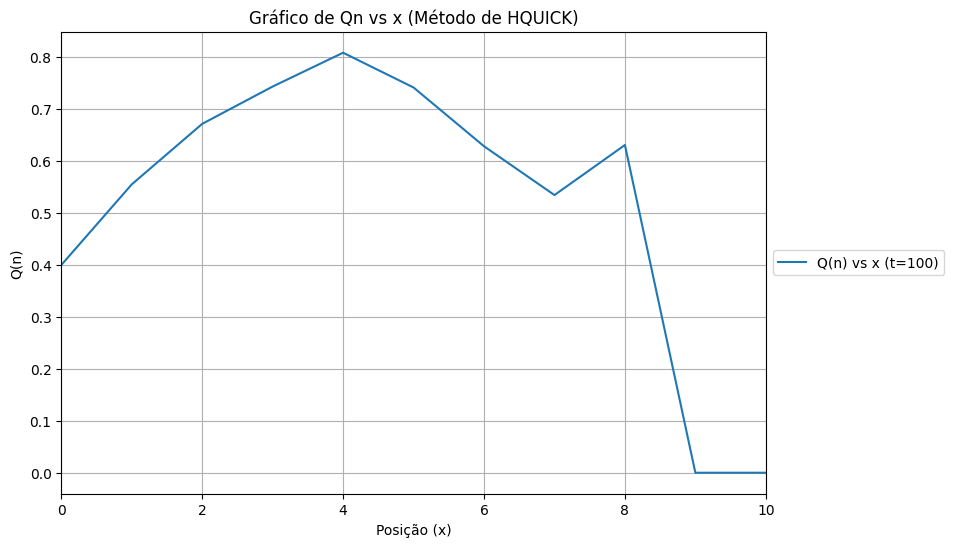

In [ ]:
# Código do Trabalho 3

# HQUICK

if bigO1 >= 0:
  Vpos = (2*(bigO1 + bigO1))/(3 + bigO1)
else:
  bigO1 = -bigO1
  Vpos = (2*(bigO1 + bigO1))/(3 + bigO1)
  bigO1 = -bigO1



if bigO2 >= 0:
  Vneg = (2*(bigO2 + bigO2))/(3 + bigO2)
else:
  bigO2 = -bigO2
  Vneg = (2*(bigO2 + bigO2))/(3 + bigO2)
  bigO2 = -bigO2


i = 1
n = 0

while n < (passos_t - 1):

  while i < (passos_L - 2):

    if (n <= tINT):
      Qn[0] = cA
    else:
      Qn[0] = cC

    Qn[i]= QnAnt[i] - bigC*(QnAnt[i] - QnAnt[i-1]) - (bigC/2)*(1 - bigC)*(Vpos*(QnAnt[i+1] - QnAnt[i]) - Vneg*(QnAnt[i] - QnAnt[i-1]))

    i = i + 1

  QnAnt = Qn
  n = n + 1
  i = 1


# Montagem dos gráficos
# Gráfico de posições de X para o mesmo tempo ------------------------------------------------------------------------------------------
"""
valores_x = Qn[t_graph,:]
valores_t = Qn[:,Lx_graph]
"""
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)

#plt.plot(passos_Lx, valores_x, label=f'Qn vs x (t={t_graph})')
plt.plot(passos_Lx, Qn, label=f'Q(n) vs x (t={t_graph})')

plt.xlabel('Posição (x)')
plt.ylabel('Q(n)')
plt.title('Gráfico de Qn vs x (Método de HQUICK)')
plt.xlim([0, Lx_final])
#plt.ylim([-1, 1])
plt.grid(True)
plt.legend()

# Move a legenda para fora do gráfico
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

print("Tempo de rodagem do código: ", timerCode)
print("\n\n")

Tempo de rodagem do código:  0.030519485473632812





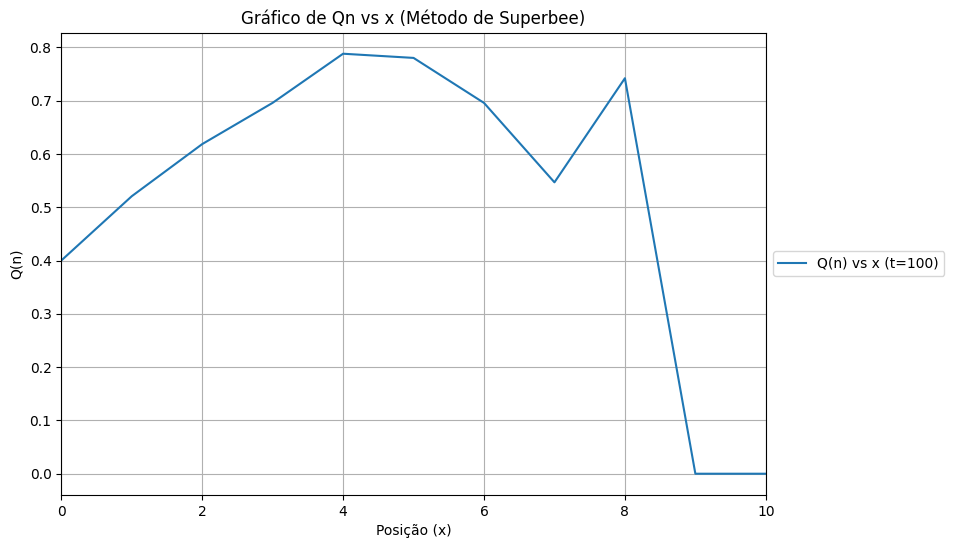

In [ ]:
# Código do Trabalho 3

# Superbee

if bigO1 >= 0:
  Vpos = max(0,min(1,(2*bigO1)),min(2,bigO1))
else:
  bigO1 = -bigO1
  Vpos = (2*(bigO1 + bigO1))/(3 + bigO1)
  bigO1 = -bigO1



if bigO2 >= 0:
  Vneg = (2*(bigO2 + bigO2))/(3 + bigO2)
else:
  bigO2 = -bigO2
  Vneg = (2*(bigO2 + bigO2))/(3 + bigO2)
  bigO2 = -bigO2


i = 1
n = 0

while n < (passos_t - 1):

  while i < (passos_L - 2):

    if (n <= tINT):
      Qn[0] = cA
    else:
      Qn[0] = cC

    Qn[i]= QnAnt[i] - bigC*(QnAnt[i] - QnAnt[i-1]) - (bigC/2)*(1 - bigC)*(Vpos*(QnAnt[i+1] - QnAnt[i]) - Vneg*(QnAnt[i] - QnAnt[i-1]))

    i = i + 1

  QnAnt = Qn
  n = n + 1
  i = 1


# Montagem dos gráficos
# Gráfico de posições de X para o mesmo tempo ------------------------------------------------------------------------------------------
"""
valores_x = Qn[t_graph,:]
valores_t = Qn[:,Lx_graph]
"""
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)

#plt.plot(passos_Lx, valores_x, label=f'Qn vs x (t={t_graph})')
plt.plot(passos_Lx, Qn, label=f'Q(n) vs x (t={t_graph})')

plt.xlabel('Posição (x)')
plt.ylabel('Q(n)')
plt.title('Gráfico de Qn vs x (Método de Superbee)')
plt.xlim([0, Lx_final])
#plt.ylim([-1, 1])
plt.grid(True)
plt.legend()

# Move a legenda para fora do gráfico
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

print("Tempo de rodagem do código: ", timerCode)
print("\n\n")

Tempo de rodagem do código:  0.030519485473632812





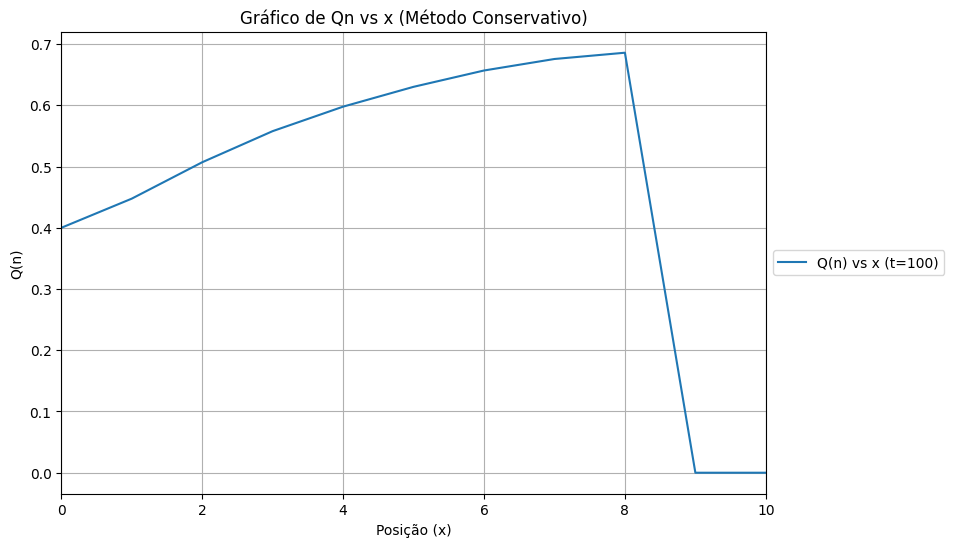

In [ ]:
# Código do Trabalho 4

# Conservativo

i = 1
n = 0

while n < (passos_t - 1):

  while i < (passos_L - 2):

    if (n <= tINT):
      Qn[0] = cA
    else:
      Qn[0] = cC

    Qn[i]= QnAnt[i] - (t_delta/Lx_delta)*((QnAnt[i]*QnAnt[i]*0.5) - (QnAnt[i-1]*QnAnt[i-1]*0.5))

    i = i + 1

  QnAnt = Qn
  n = n + 1
  i = 1


# Montagem dos gráficos
# Gráfico de posições de X para o mesmo tempo ------------------------------------------------------------------------------------------
"""
valores_x = Qn[t_graph,:]
valores_t = Qn[:,Lx_graph]
"""
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)

#plt.plot(passos_Lx, valores_x, label=f'Qn vs x (t={t_graph})')
plt.plot(passos_Lx, Qn, label=f'Q(n) vs x (t={t_graph})')

plt.xlabel('Posição (x)')
plt.ylabel('Q(n)')
plt.title('Gráfico de Qn vs x (Método Conservativo)')
plt.xlim([0, Lx_final])
#plt.ylim([-1, 1])
plt.grid(True)
plt.legend()

# Move a legenda para fora do gráfico
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

print("Tempo de rodagem do código: ", timerCode)
print("\n\n")

Tempo de rodagem do código:  0.030519485473632812





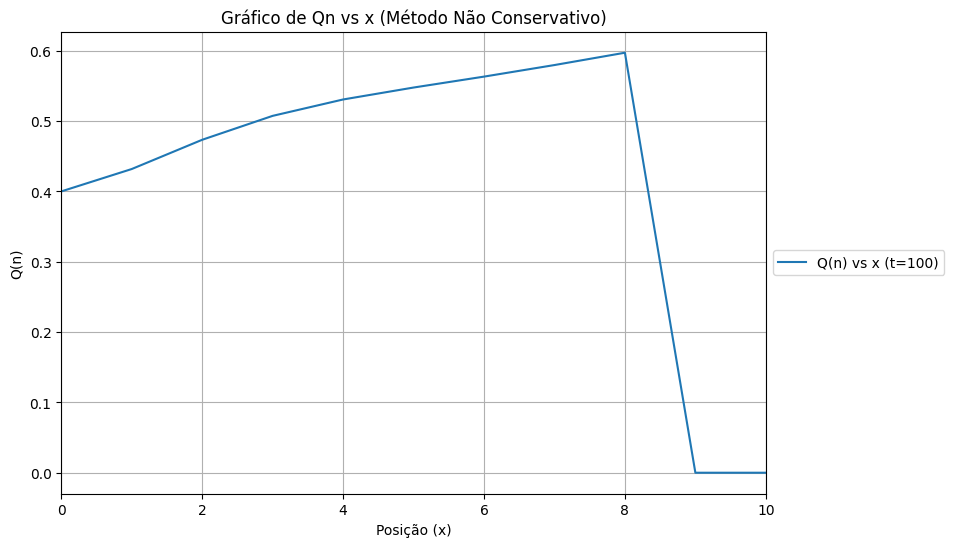

In [ ]:
# Código do Trabalho 4

# Não Conservativo

i = 1
n = 0

while n < (passos_t - 1):

  while i < (passos_L - 2):

    if (n <= tINT):
      Qn[0] = cA
    else:
      Qn[0] = cC

    Qn[i]= QnAnt[i] - ((QnAnt[i]*t_delta)/Lx_delta)*(QnAnt[i] - QnAnt[i-1])

    i = i + 1

  QnAnt = Qn
  n = n + 1
  i = 1


# Montagem dos gráficos
# Gráfico de posições de X para o mesmo tempo ------------------------------------------------------------------------------------------
"""
valores_x = Qn[t_graph,:]
valores_t = Qn[:,Lx_graph]
"""
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)

#plt.plot(passos_Lx, valores_x, label=f'Qn vs x (t={t_graph})')
plt.plot(passos_Lx, Qn, label=f'Q(n) vs x (t={t_graph})')

plt.xlabel('Posição (x)')
plt.ylabel('Q(n)')
plt.title('Gráfico de Qn vs x (Método Não Conservativo)')
plt.xlim([0, Lx_final])
#plt.ylim([-1, 1])
plt.grid(True)
plt.legend()

# Move a legenda para fora do gráfico
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

print("Tempo de rodagem do código: ", timerCode)
print("\n\n")